In [1]:
setwd("/data/wangjl/scScripts/")
getwd()

[1] "/data/wangjl/scScripts"

In [2]:
dir.create("backup/a3/") #visual/

outputRoot=paste0( getwd(), "/backup/a3/") 
outputRoot

[1] "/data/wangjl/scScripts/backup/a3/"

ggplot2 排版:
- plotc = (p1|p2)/(p3|p4) #排序， |是左右；/是上下；

In [273]:
##
library(Seurat)
library(monocle)

library(tidyverse)
library(patchwork)

可供参考的Seurat代码:
- https://www.cnblogs.com/shanyr/p/11683505.html

# load data

In [4]:
scRNA <- readRDS("backup/a1/pbmc10k_final.rds")
scRNA

An object of class Seurat 
22860 features across 10441 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [13]:
head(scRNA@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTATCGTAC pbmc10k     1628       749          0.4299754 0              
AAACCCAGTCGGTGAA pbmc10k     6590      1867         10.3034901 13             
AAACCCAGTTAGAAAC pbmc10k    17318      3809          5.4913962 0              
AAACCCAGTTATCTTC pbmc10k     3526      1516         13.4997164 7              
AAACCCAGTTGCCGAC pbmc10k     6228      2110          6.0533076 0              
AAACCCAGTTTCCCAC pbmc10k    22044      4598          6.5278534 9              
                 seurat_clusters cellType  
AAACCCAGTATCGTAC 0               CD14+ Mono
AAACCCAGTCGGTGAA 13              CD8 T     
AAACCCAGTTAGAAAC 0               CD14+ Mono
AAACCCAGTTATCTTC 7               NK        
AAACCCAGTTGCCGAC 0               CD14+ Mono
AAACCCAGTTTCCCAC 9               CD14+ Mono

In [14]:
levels( scRNA@meta.data$seurat_clusters )

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19"

In [17]:
levels(Idents(scRNA))

[1] "CD14+ Mono"   "Naive CD4 T"  "CD8 T"        "Memory CD4 T" "FCGR3A+ Mono"
 [6] "B"            "NK"           "DC"           "CD4+ CTL"     "?"           
[11] "Platelet"

In [22]:
levels(scRNA@active.ident)

[1] "CD14+ Mono"   "Naive CD4 T"  "CD8 T"        "Memory CD4 T" "FCGR3A+ Mono"
 [6] "B"            "NK"           "DC"           "CD4+ CTL"     "?"           
[11] "Platelet"

## change active.ident

In [38]:
scRNA0=(function(){    
    #
    named=factor(scRNA@meta.data$seurat_clusters)
    names(named)=rownames( scRNA@meta.data )
    #
    scRNA2=scRNA
    scRNA2@active.ident=named
    print(levels(scRNA2@active.ident))
    scRNA2
})()
scRNA0

 [1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19"


An object of class Seurat 
22860 features across 10441 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne

## FindAllMarkers

In [90]:
diff_genes_wilcox=FindAllMarkers(scRNA0) #10 min: 11:46 - 
dim(diff_genes_wilcox)
head(diff_genes_wilcox)

# write to file
pbmc.markers=diff_genes_wilcox
top10 <- pbmc.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
dim(top10)

write.csv(top10, paste0(outputRoot, "top10_diff_genes_wilcox.csv"))

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19



[1] 23493     7

p_val avg_logFC pct.1 pct.2 p_val_adj cluster gene   
S100A8  0     3.203883  1.000 0.410 0         0       S100A8 
S100A9  0     3.058732  1.000 0.565 0         0       S100A9 
LYZ     0     2.636891  1.000 0.569 0         0       LYZ    
S100A12 0     2.248656  0.950 0.093 0         0       S100A12
VCAN    0     2.211116  0.973 0.147 0         0       VCAN   
MNDA    0     2.205240  0.999 0.227 0         0       MNDA

# visual functions

Seurat自带一些优秀的可视化工具:

- 函数  singleGene,  MultipleGenes, DimentionReduction, ClusterInformation;
- RidgePlot: S -- C
- VlnPlot: S -- C
- FeaturePlot: - M - C
- DotPlot: -M-C
- FeatureScatter: -M-C
- DimPlot: -- D C


## DimPlot 降维图

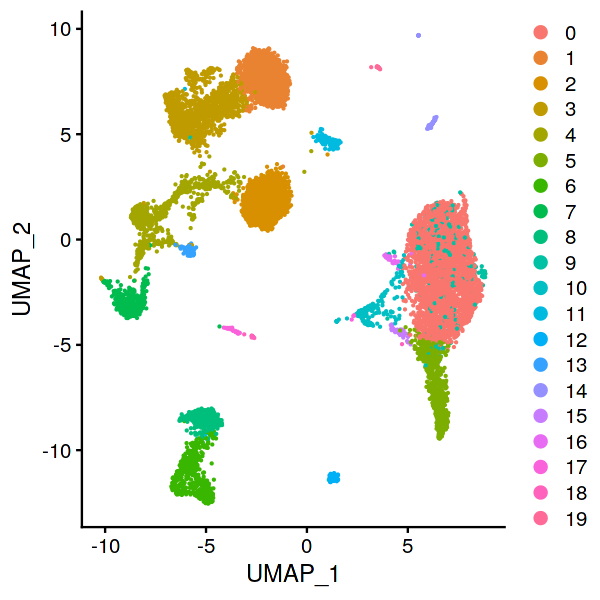

In [44]:
DimPlot(scRNA0) #默认是UMAP降维

### 控制长宽比(jupyter)

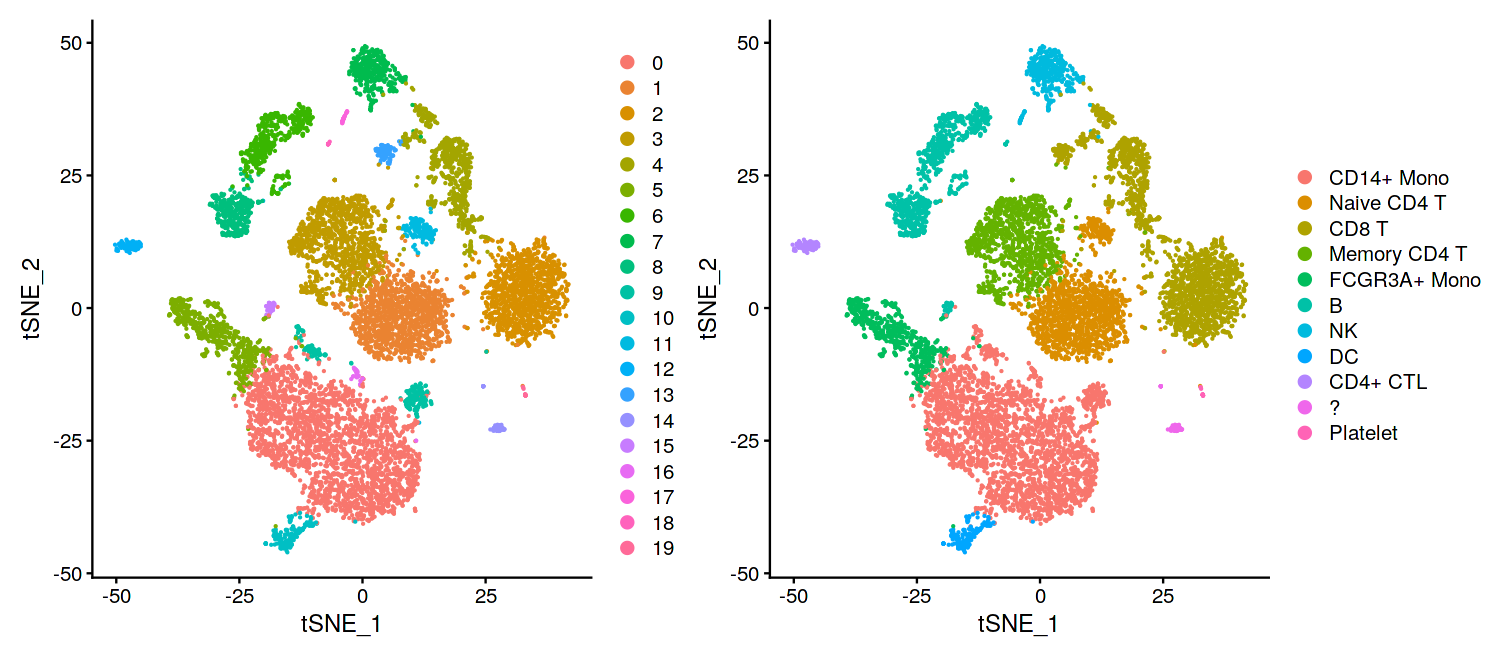

In [39]:
# tSNE，默认参数
options(repr.plot.width=12.5, repr.plot.height=5.5) #控制长宽比，和pdf的类似
p0=DimPlot(scRNA0, reduction = 'tsne')
p1=DimPlot(scRNA, reduction = 'tsne')
pc=p0|p1 
pc

### cluster标签标在图中

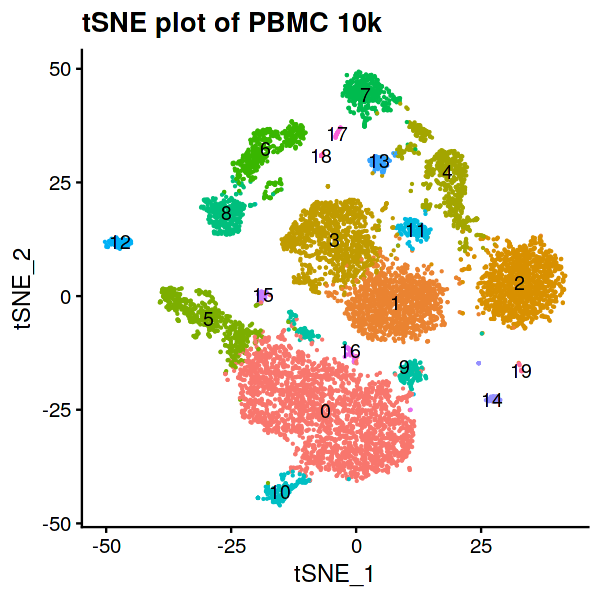

In [43]:
options(repr.plot.width=5, repr.plot.height=5)

# cluster标签显示到图中
library(ggplot2)
DimPlot(scRNA0, reduction = 'tsne',
       label=T, #图中添加编号
       )+
    labs(title="tSNE plot of PBMC 10k")+ #添加标题
    NoLegend() #不要图例

### 自定义颜色

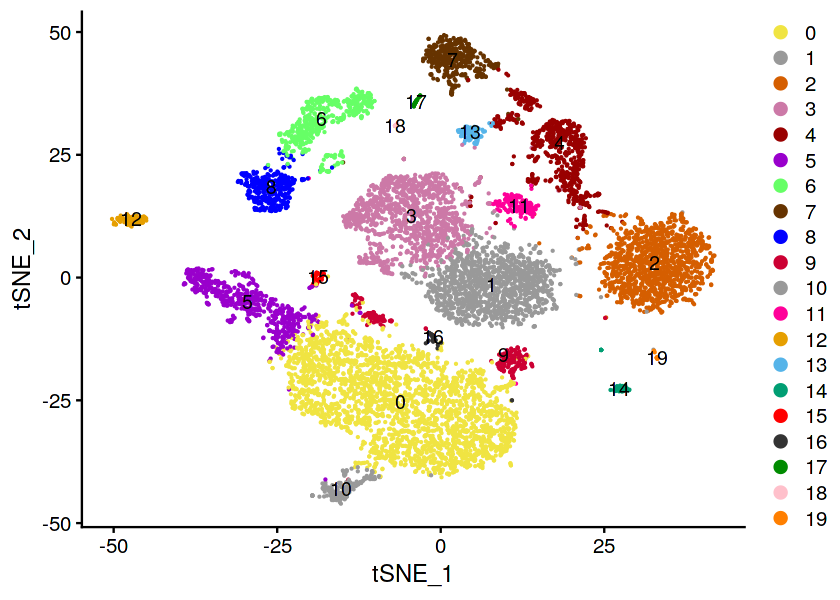

In [213]:
options(repr.plot.width=7, repr.plot.height=5)

# 自定义颜色
colSet=c(
    "#F0E442", "#999999", "#D55E00", "#CC79A7","#990000","#9900CC","#66FF66","#663300","#0000FF",
 "#CC0033","#999999","#FF0099", "#E69F00", "#56B4E9", "#009E73","#FF0000","#333333",
#
'green4', 'pink', '#FF7F00', 'orchid', '#99c9fb', 'dodgerblue2', 'grey30', 'yellow', 'grey60', 
'grey', 'red', '#FB9A99','black' )

DimPlot(scRNA0,reduction = "tsne", 
        label=T,
        cols =colSet[1:20] )

### 指定着色方法 group.by

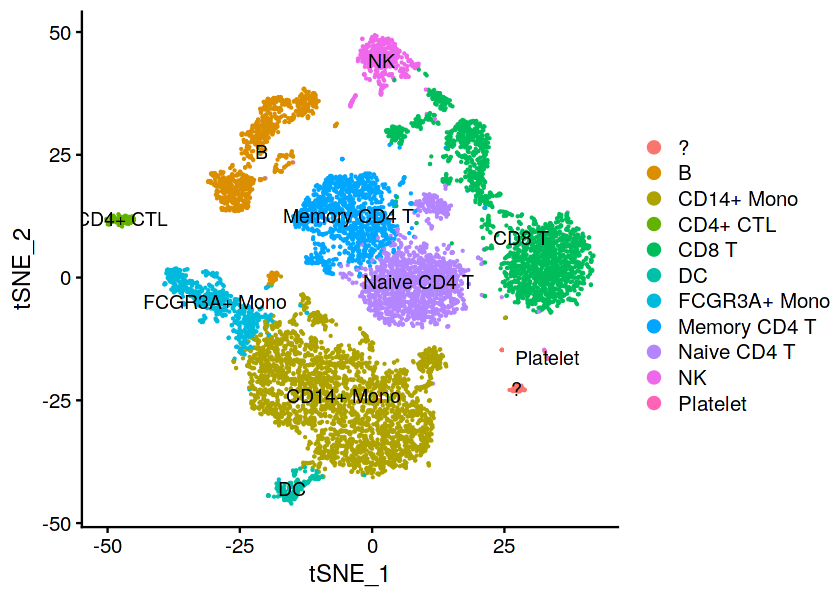

In [133]:
options(repr.plot.width=7, repr.plot.height=5)

DimPlot(scRNA0, reduction = 'tsne', group.by = "cellType", label=T)

## VlnPlot小提琴图

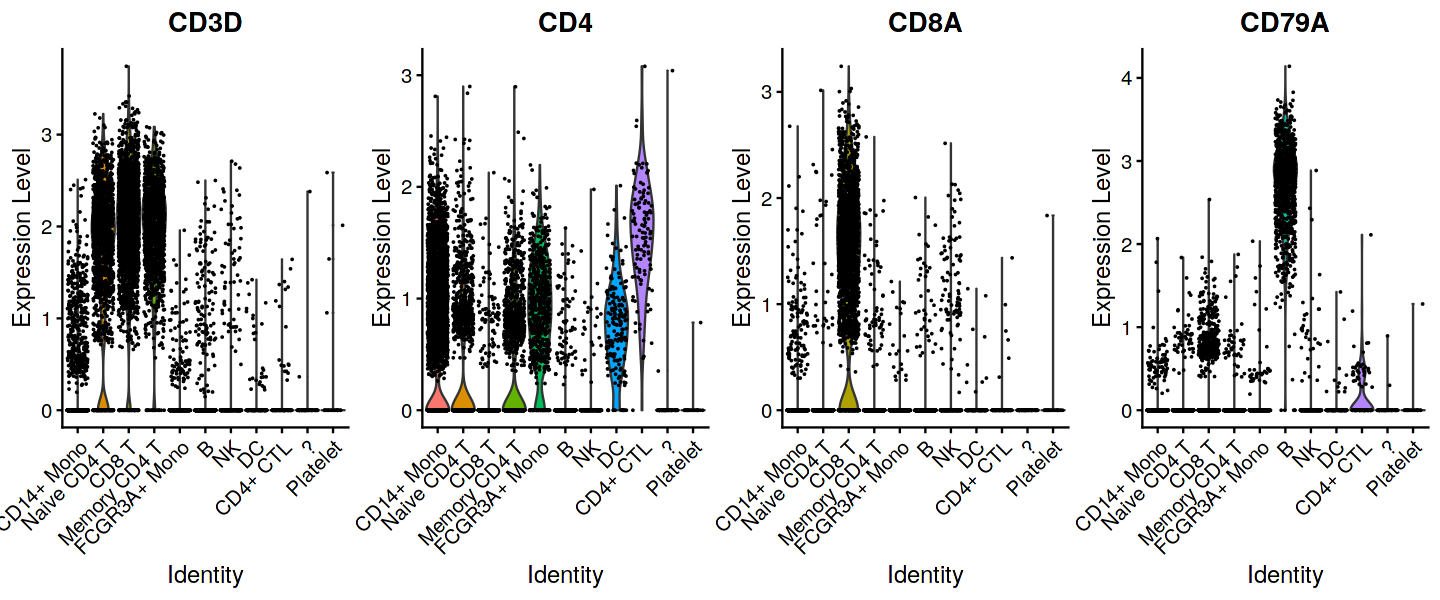

In [51]:
options(repr.plot.width=12, repr.plot.height=5)

VlnPlot(scRNA, features =c("CD3D","CD4", "CD8A","CD79A"), ncol = 4,
        pt.size = 0.01  #控制点的大小
       ) 

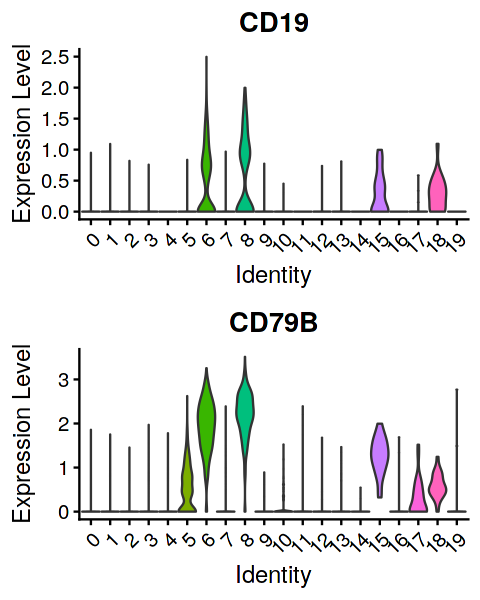

In [186]:
options(repr.plot.width=4, repr.plot.height=5)
VlnPlot(scRNA0, features =c("CD19", "CD79B"), ncol = 1, pt.size = 0 ) 

### 共用图例

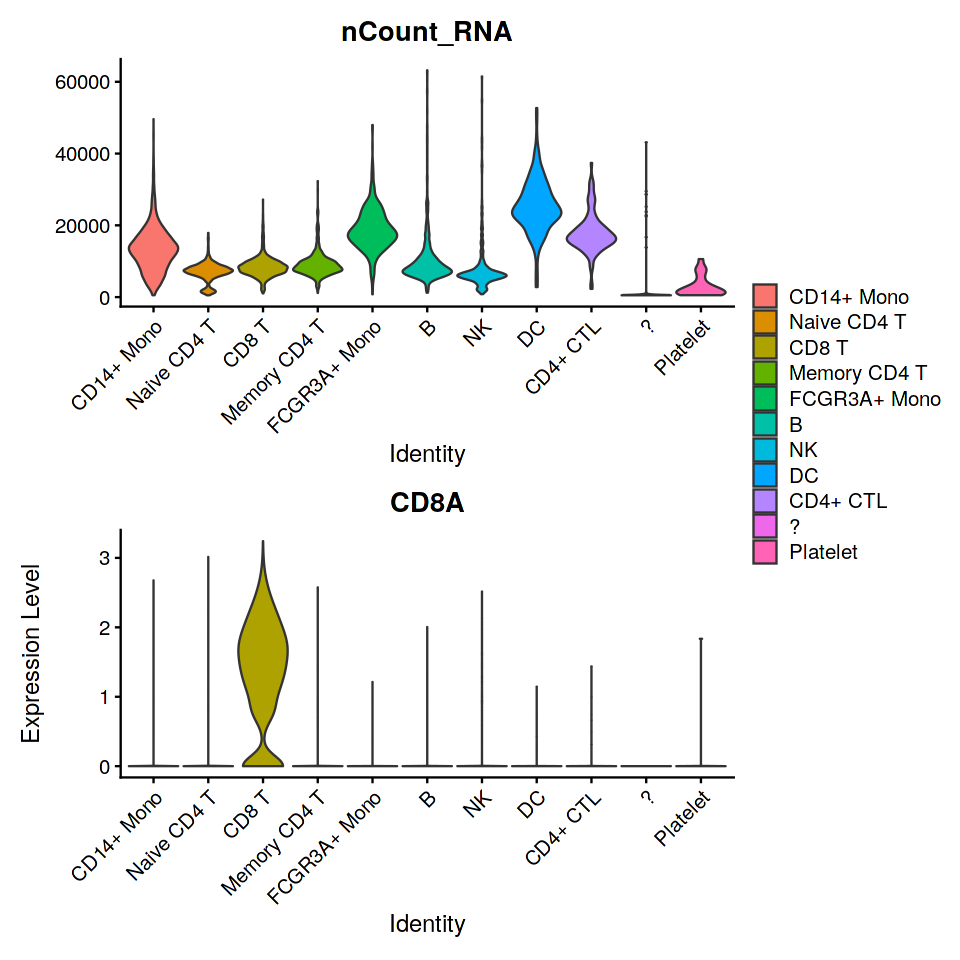

In [53]:
p1 = VlnPlot(scRNA, features = "nCount_RNA", pt.size = 0) #0表示不要点
p2 = VlnPlot(scRNA, features = "CD8A", pt.size = 0)
plotc = p1/p2 + plot_layout(guides = 'collect') #公用图例

options(repr.plot.width=8, repr.plot.height=8)
plotc

ggsave( paste0(outputRoot, '01_vlnplot_eg.pdf'), plotc, width = 8,height = 8)

结论: 图中?RNA很少，很可能是细胞碎片，可以去掉了。

### 批量小提琴图

In [214]:
table(scRNA@active.ident, scRNA@meta.data$seurat_clusters)

              
                  0    1    2    3    4    5    6    7    8    9   10   11   12
  CD14+ Mono   2807    0    0    0    0    0    0    0    0  232    0    0    0
  Naive CD4 T     0 1322    0    0    0    0    0    0    0    0    0  170    0
  CD8 T           0    0 1252    0  744    0    0    0    0    0    0    0    0
  Memory CD4 T    0    0    0 1242    0    0    0    0    0    0    0    0    0
  FCGR3A+ Mono    0    0    0    0    0  654    0    0    0    0    0    0    0
  B               0    0    0    0    0    0  542    0  389    0    0    0    0
  NK              0    0    0    0    0    0    0  437    0    0    0    0    0
  DC              0    0    0    0    0    0    0    0    0    0  188    0    0
  CD4+ CTL        0    0    0    0    0    0    0    0    0    0    0    0  113
  ?               0    0    0    0    0    0    0    0    0    0    0    0    0
  Platelet        0    0    0    0    0    0    0    0    0    0    0    0    0
              
          

In [263]:
# 准备数据1
gene_list1=c(
    "CD3D","CD3E", "CD4", #naive CD4
    'CD8A','CD8B', #CD8
    "S100A4",  #mem CD4
    "NKG7","GNLY", "NCR3","PRF1","GZMB","GZMK", #NK
    "GZMH", "GZMA","GZMM",
    "CD14",'LYZ', "FCGR3A", #mono
    "MS4A1",'CD79A',"CD79B","CD19","IGHG1","IGHA1", #B
    "FCER1A", #DC
    "PPBP","TUBB1","GAPDH", #Platelet
    "FOXP3", "IL2RA", "HLA-DRB1", "HLA-DPB1", "IFNG","TNFRSF4", #"OX40",
    "ITGB1","CCR7", "LTB", "KLRB1",
    "JUN" #发育过程
)

cluster_list=levels(scRNA@meta.data$seurat_clusters)
cluster_list

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19"

In [266]:
# 准备数据2
df1=NULL;
for( cluster in cluster_list){
    message(cluster)
    rs=scRNA@meta.data
    cid=rownames( rs[which(rs$seurat_clusters== cluster),] )
    #
    mtx=scRNA@assays$RNA@data[, cid]
    for( gene in gene_list1){
        df2=data.frame(value=as.numeric( mtx[gene, ]) )
        df2$variable=gene
        df2$seurat_clusters=cluster
        #
        df1=rbind(df1, df2)
    }
}
rm(cluster, rs, df2)

dim(df1)
head(df1)

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19



[1] 407199      3

value variable seurat_clusters
1 0     CD3D     0              
2 0     CD3D     0              
3 0     CD3D     0              
4 0     CD3D     0              
5 0     CD3D     0              
6 0     CD3D     0

In [270]:
# as factor
df1$seurat_clusters=factor(df1$seurat_clusters, levels=c(0:19))
table(df1$seurat_clusters)


df1$variable=factor(df1$variable, levels=gene_list1)
table(df1$variable)


     0      1      2      3      4      5      6      7      8      9     10 
109473  51558  48828  48438  29016  25506  21138  17043  15171   9048   7332 
    11     12     13     14     15     16     17     18     19 
  6630   4407   4251   2847   1794   1677   1248    897    897 


    CD3D     CD3E      CD4     CD8A     CD8B   S100A4     NKG7     GNLY 
   10441    10441    10441    10441    10441    10441    10441    10441 
    NCR3     PRF1     GZMB     GZMK     GZMH     GZMA     GZMM     CD14 
   10441    10441    10441    10441    10441    10441    10441    10441 
     LYZ   FCGR3A    MS4A1    CD79A    CD79B     CD19    IGHG1    IGHA1 
   10441    10441    10441    10441    10441    10441    10441    10441 
  FCER1A     PPBP    TUBB1    GAPDH    FOXP3    IL2RA HLA-DRB1 HLA-DPB1 
   10441    10441    10441    10441    10441    10441    10441    10441 
    IFNG  TNFRSF4    ITGB1     CCR7      LTB    KLRB1      JUN 
   10441    10441    10441    10441    10441    10441    10441 

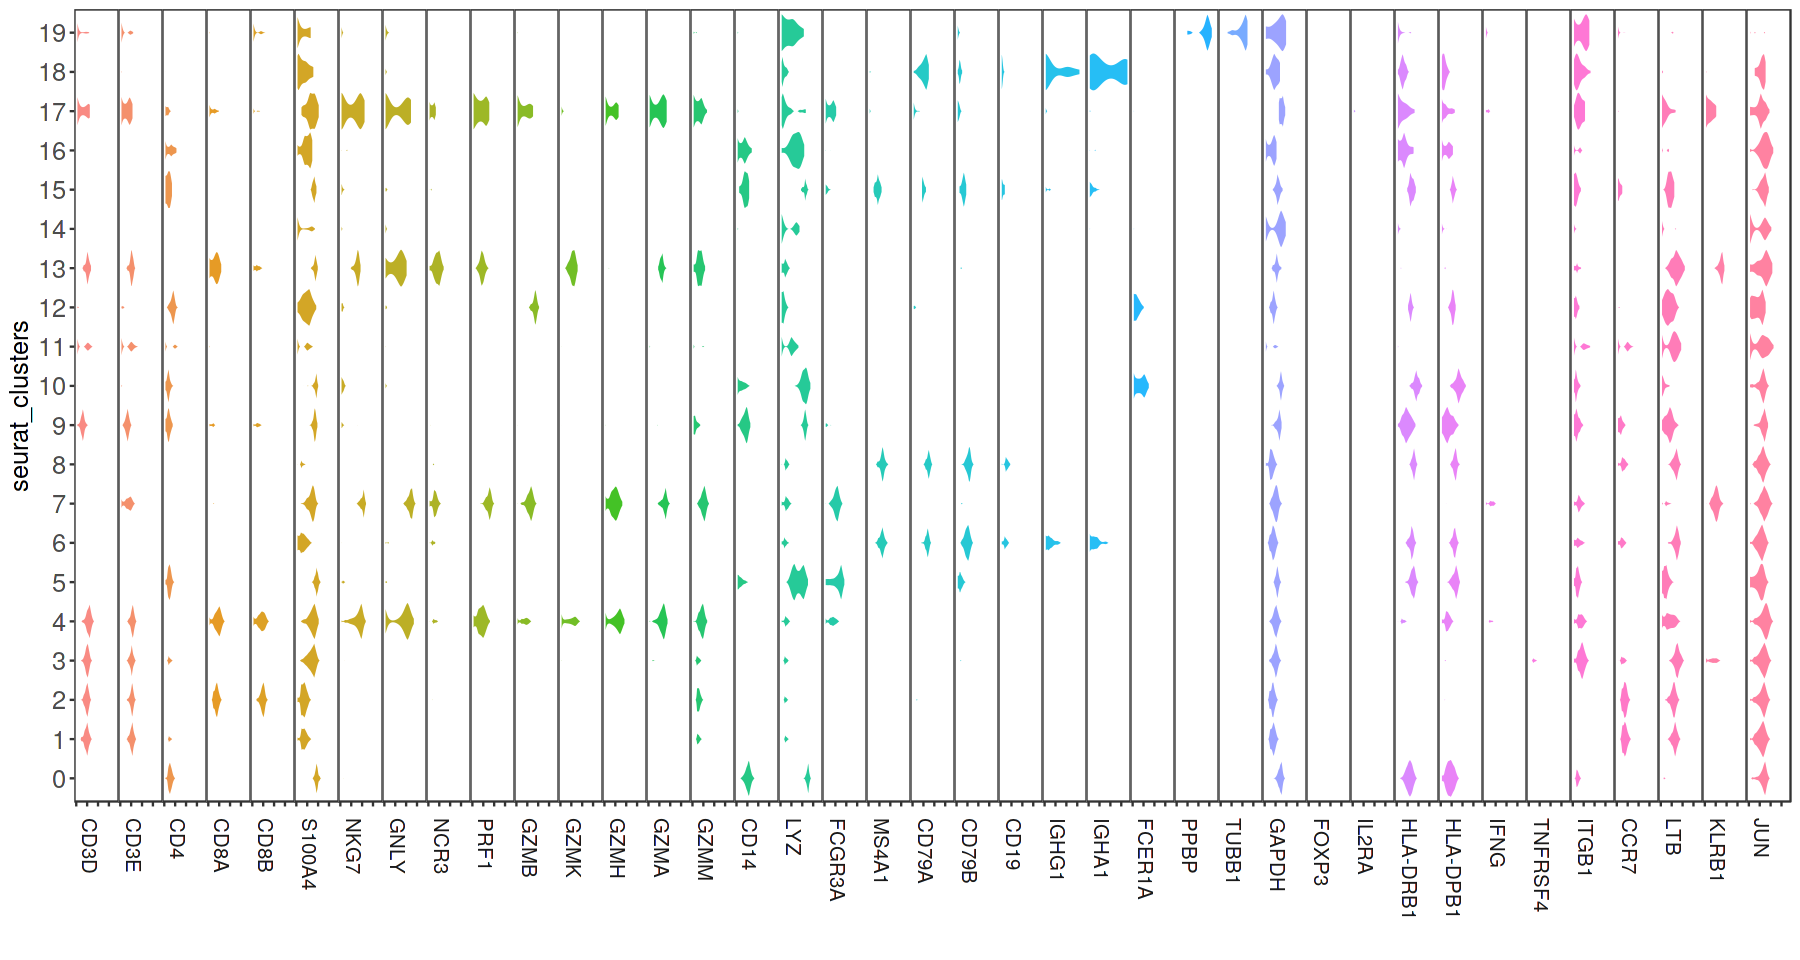

In [271]:
#2. 旋转小提琴图
p2 = ggplot(df1,aes(x=seurat_clusters,y=value,fill=variable))+
  geom_violin(scale = "width", colour="white", alpha=0.85, width=1) +
  coord_flip() + #guides(fill=FALSE)
    labs(y="")+
  facet_wrap(variable~., nrow = 1, strip.position = "bottom") + 
  theme_bw() +
  theme(
        panel.grid = element_blank(), #不要背景网格
        axis.text.x = element_blank(), #不要x坐标轴刻度文字

        axis.text.y = element_text(size=15), #y坐标刻度字号
        axis.title.y = element_text(size=15), #y标题字号
        
        legend.position = "none", #不要图例
        panel.spacing=unit(0,"cm"), #分面的间距
    
        strip.placement = "outside", #分面标签位置
        strip.text.x = element_text(angle=-90,vjust=0,hjust = 0,size=12), #分面标签 文字倾斜; 字号
        strip.background = element_blank() #分面标签 不要背景
    )

options(repr.plot.width=15, repr.plot.height=8)
print(p2)

### todo: 更完善的代码

## FeaturePlot特征图

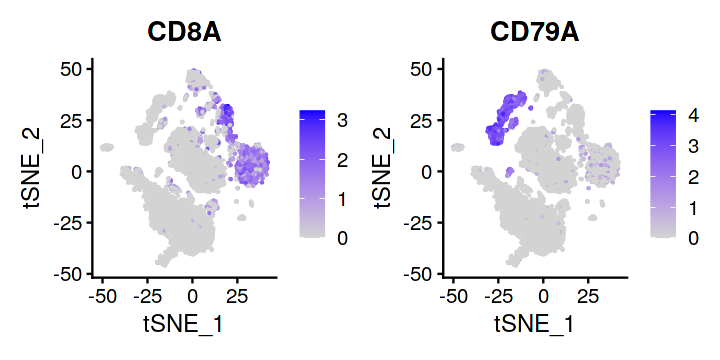

In [55]:
p1 <- FeaturePlot(scRNA,features = "CD8A", reduction = 'tsne')
p2 <- FeaturePlot(scRNA,features = "CD79A", reduction = 'tsne')
plotc = p1|p2

options(repr.plot.width=6, repr.plot.height=3)
plotc

ggsave( paste0(outputRoot,'01_featureplot_eg.pdf'), plotc, width = 6, height = 3)

## DotPlot点图

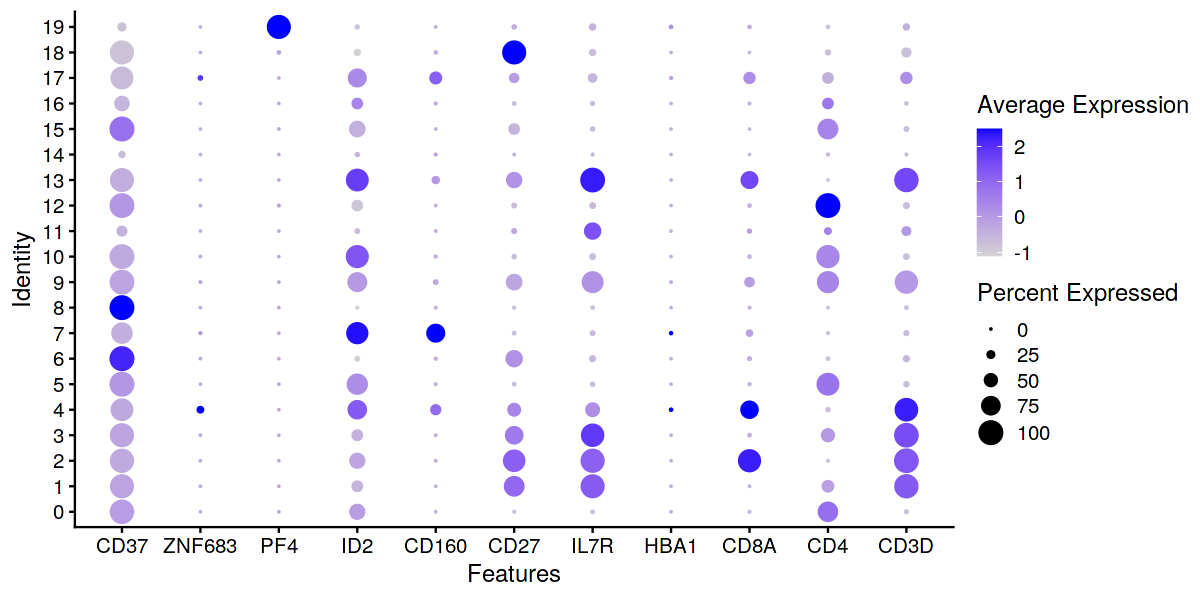

In [206]:
options(repr.plot.width=10, repr.plot.height=5)

DotPlot(scRNA0, features = c("CD3D","CD4","CD8A",'HBA1',"IL7R",'CD27', "CD160","ID2","PF4",'ZNF683',
                            "CD37"))

### X坐标倾斜60度(PBMC marker)

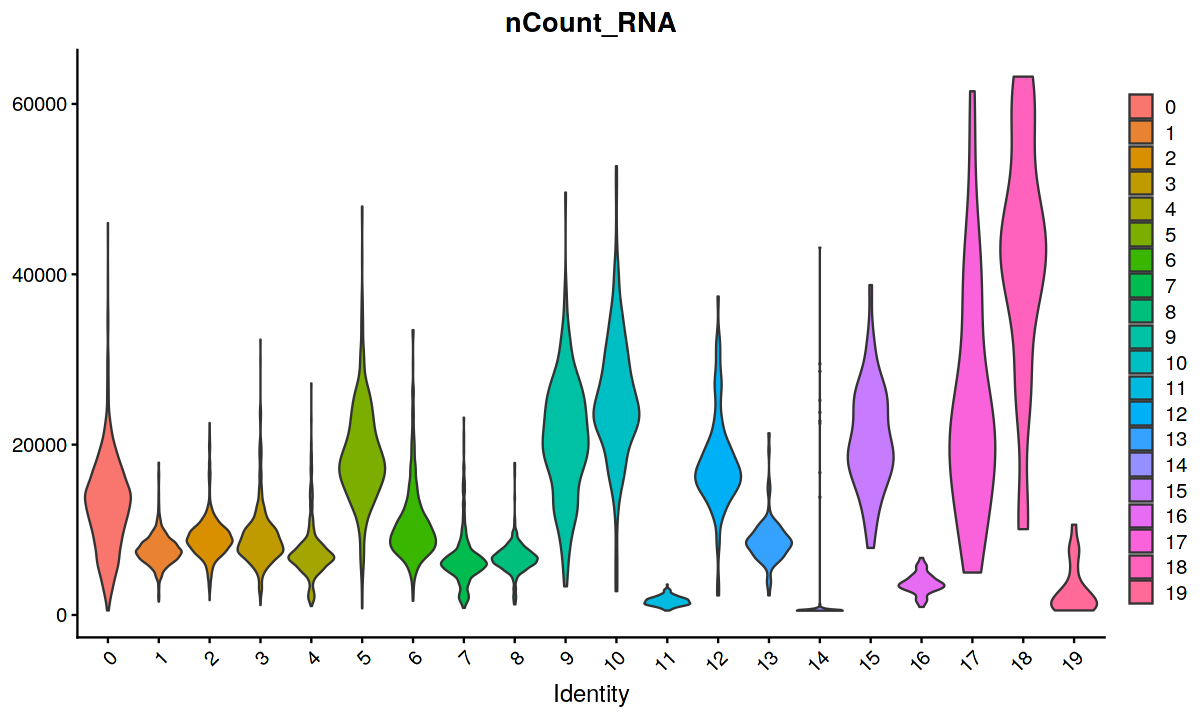

In [89]:
VlnPlot(scRNA0, features = "nCount_RNA", pt.size = 0)
# c11,14,16,19可以整体去掉了。

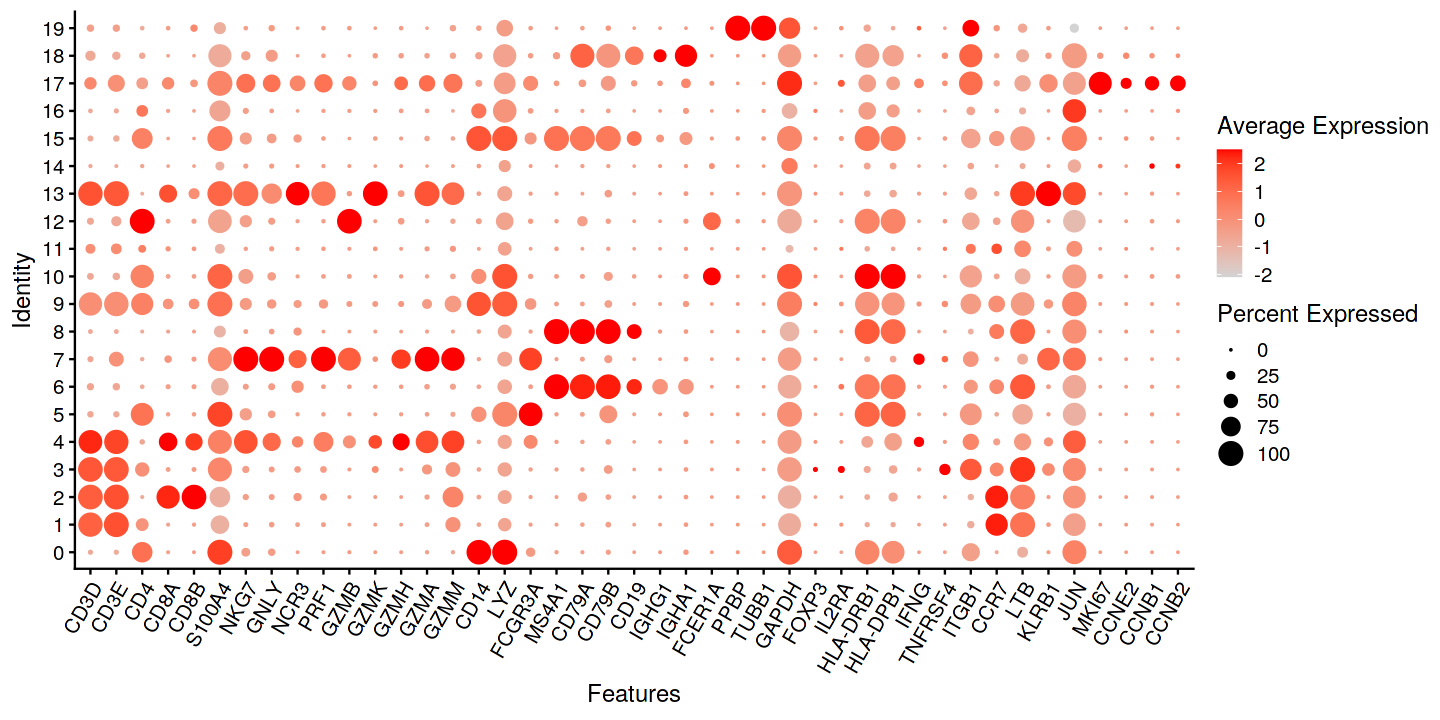

In [208]:
genelist.byHand = c(
    "CD3D","CD3E", "CD4", #naive CD4
    'CD8A','CD8B', #CD8
    "S100A4",  #mem CD4
    "NKG7","GNLY", "NCR3","PRF1","GZMB","GZMK", #NK
    "GZMH", "GZMA","GZMM",
    "CD14",'LYZ', "FCGR3A", #mono
    "MS4A1",'CD79A',"CD79B","CD19","IGHG1","IGHA1", #B
    "FCER1A", #DC
    "PPBP","TUBB1","GAPDH", #Platelet
    "FOXP3", "IL2RA", "HLA-DRB1", "HLA-DPB1", "IFNG","TNFRSF4", #"OX40",
    "ITGB1","CCR7", "LTB", "KLRB1","JUN", #发育过程
    "MKI67","CCNE2","CCNB1","CCNB2") #cell cycle

# 这些标记基因在不同亚群细胞的表达量热图或者小提琴图展示一下，
# 就明白了为什么它们可以作为标记基因，来对细胞亚群进行命名了。

p = DotPlot(scRNA0, features = rev( genelist.byHand ) , 
            cols = c("lightgrey", "red"))+ #自定义颜色
    theme( axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1) )

options(repr.plot.width=12, repr.plot.height=6)
p

ggsave( paste0(outputRoot,'01_dotplot_eg.pdf'), p, width = 12, height = 6)

分类推断如下
- 没有特征: c11, c14, c16,结合RNA per cell,可以认定为细胞碎片。

- CD3D+:
    - CD4:
        - c1: Naive CD4 (CCR7+)
        - c3: CD4: 部分Treg, 感觉是个混合类
        - c9: CD4 CTL(CD14+ LYZ+)
    - CD8A:
        - c2: Naive CD8(CCR7+)
        - c4: CD8 CTL: IFNG+
        - c13: NKT(GZMK++, NCR3+)
- CD79A:
    - c6: mature B (IGHG1+)
    - c8: naive B (CCR7+)
    - c15: mem B(S100A4+) ??
    - c18: plasma B( MS4A1(CD20)-, IGHA1++) ??
- NKG7+NCR3+, GZMB+ IFNG+:
    - c7: NK
    - c17: NK (MKI67+) 周期活跃
- monocyte:
    - CD14+LYZ+: c0, (c15 ??)
    - FCGR3A+: c5
- DC:
    - c10: FCER1A+, HLA+++
- PPBP: 
    - c19:  血小板 Platelet

- 无法分类
    - c12: CD3-, CD4+++, HLA+ GZMB+
    - c15: B(CD20+), monocyte(CD14+)?

### 每类的细胞数 barplot

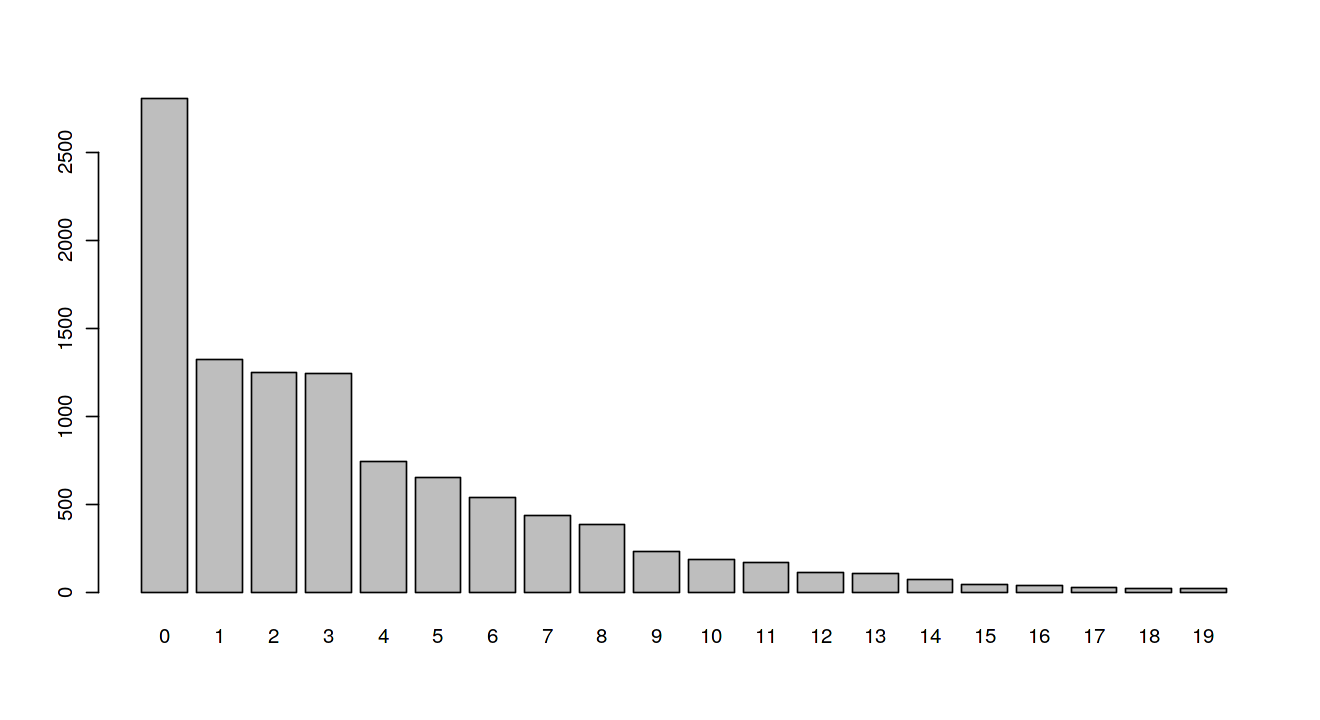

In [191]:
barplot(table(scRNA0@meta.data$seurat_clusters))

### Y坐标使用其他标签

In [111]:
head(scRNA@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTATCGTAC pbmc10k     1628       749          0.4299754 0              
AAACCCAGTCGGTGAA pbmc10k     6590      1867         10.3034901 13             
AAACCCAGTTAGAAAC pbmc10k    17318      3809          5.4913962 0              
AAACCCAGTTATCTTC pbmc10k     3526      1516         13.4997164 7              
AAACCCAGTTGCCGAC pbmc10k     6228      2110          6.0533076 0              
AAACCCAGTTTCCCAC pbmc10k    22044      4598          6.5278534 9              
                 seurat_clusters cellType  
AAACCCAGTATCGTAC 0               CD14+ Mono
AAACCCAGTCGGTGAA 13              CD8 T     
AAACCCAGTTAGAAAC 0               CD14+ Mono
AAACCCAGTTATCTTC 7               NK        
AAACCCAGTTGCCGAC 0               CD14+ Mono
AAACCCAGTTTCCCAC 9               CD14+ Mono

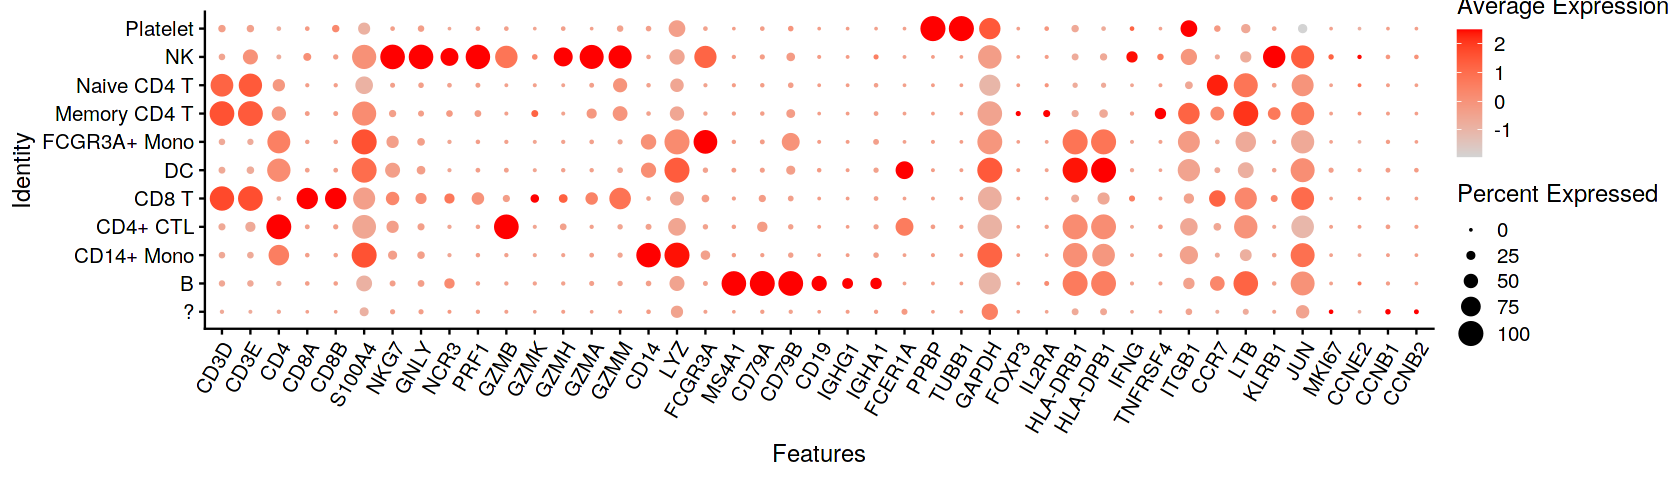

In [198]:
options(repr.plot.width=14, repr.plot.height=4)

DotPlot(scRNA, features = rev( genelist.byHand ) , 
        group.by="cellType",  ## 默认使用 seurat_clusters列，设置使用 cellType 列。
            cols = c("lightgrey", "red"))+ #自定义颜色
    theme( axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1) )
# 这个分类不准确，仅供绘图示例

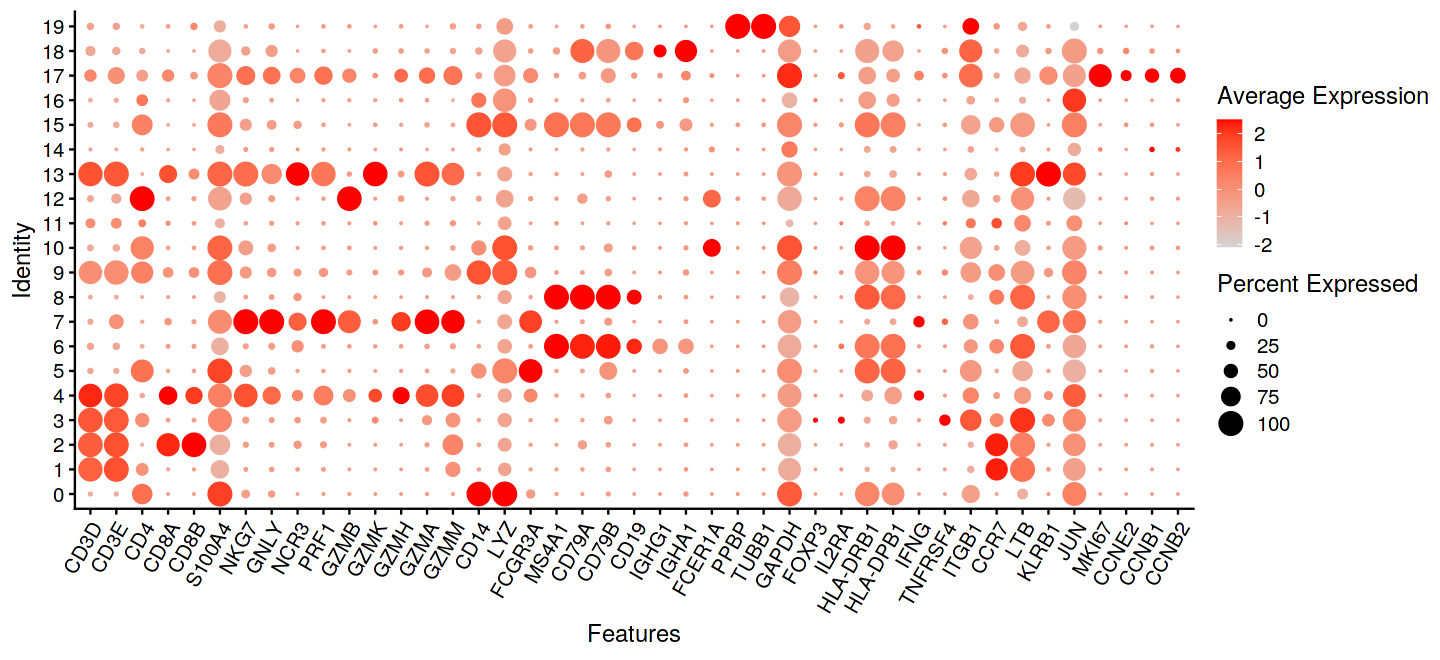

In [199]:
options(repr.plot.width=12, repr.plot.height=5.5)
DotPlot(scRNA, features = rev( genelist.byHand ) , 
        group.by="seurat_clusters",  ## 默认使用 active.ident=seurat_clusters 列，设置使用 cellType 列。
            cols = c("lightgrey", "red"))+ #自定义颜色
    theme( axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1) )

## DoHeatmap热图

[1] "S100A8"  "S100A9"  "LYZ"     "S100A12" "VCAN"    "MNDA"

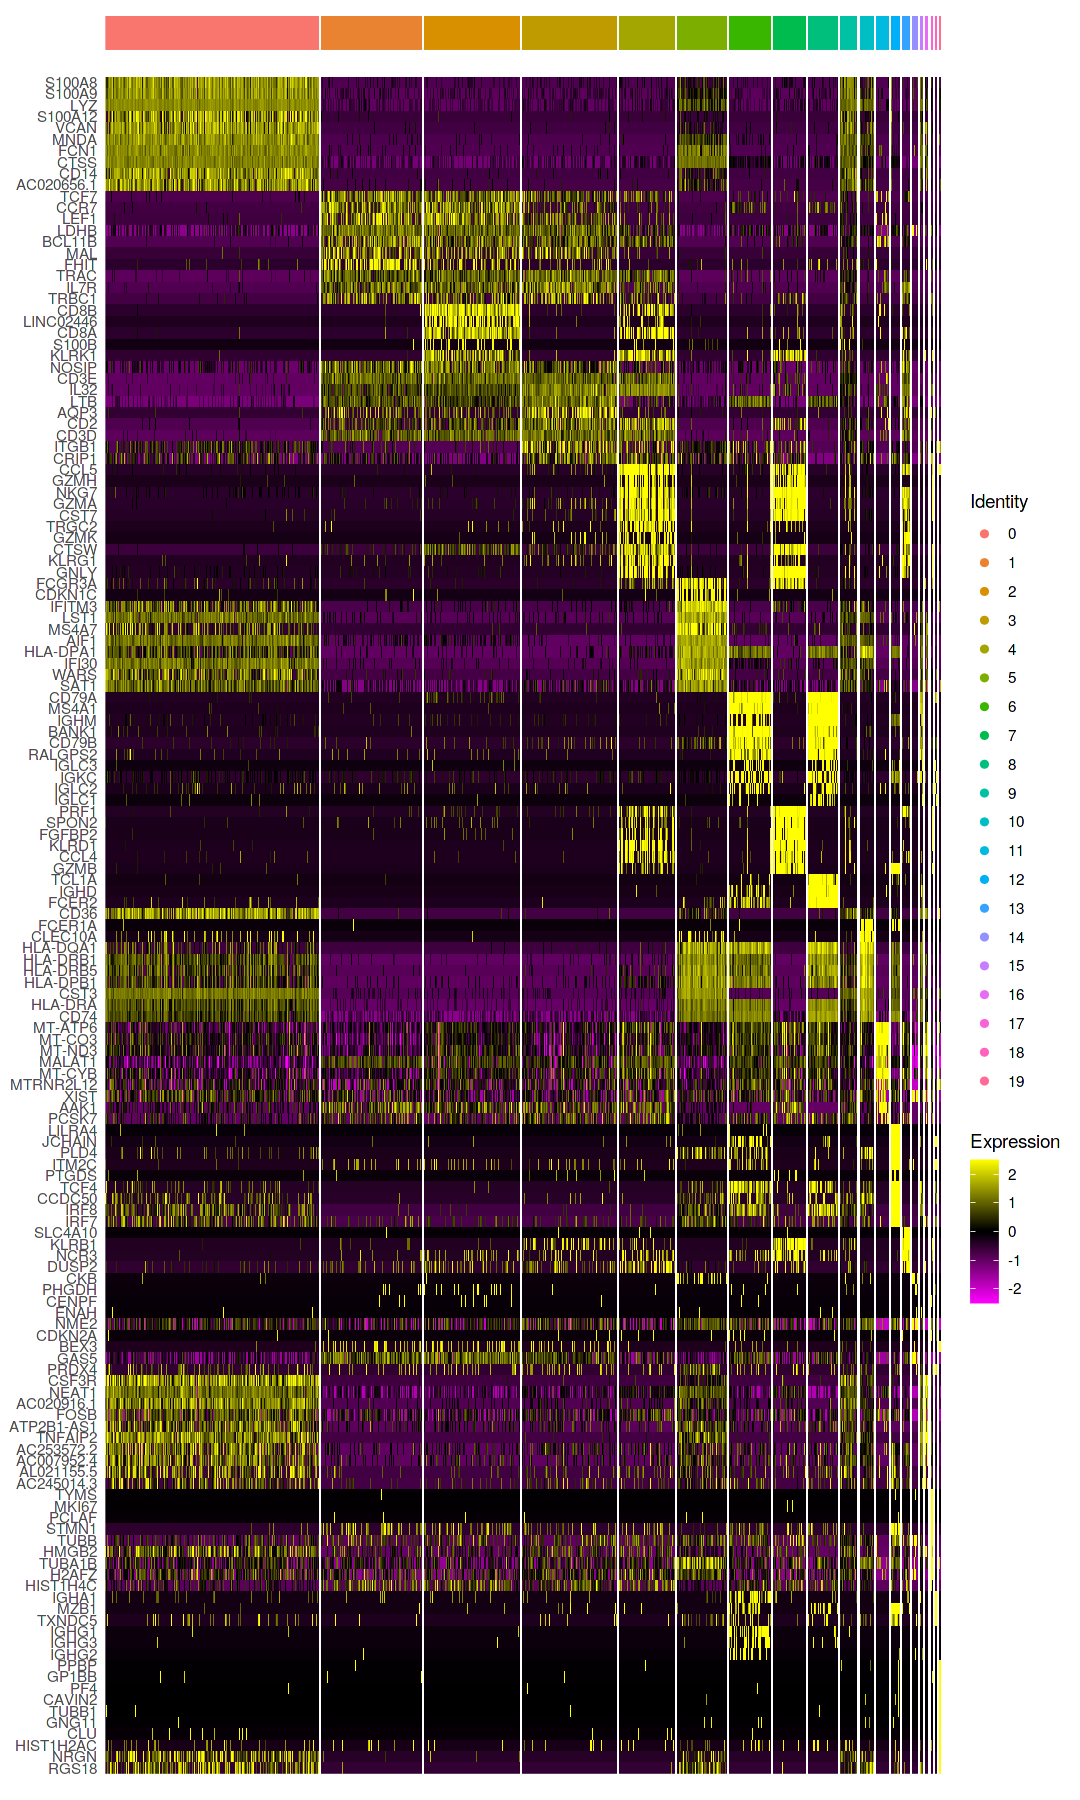

In [106]:
genelist = read.csv( paste0(outputRoot, "top10_diff_genes_wilcox.csv"), row.names = 1 )
#head(genelist)
#genelist <- pull(genelist, gene) %>% as.character
genelist <- unique( as.character( genelist$gene ) )
head(genelist)


#
p = DoHeatmap(scRNA0, features = genelist,
              label=F #防止报错，顶部不显示图例的文字
             # , group.by = "seurat_clusters" # 加不加一样
             )

options(repr.plot.width=9, repr.plot.height=15)
p

ggsave( paste0(outputRoot,'01_heatmap_eg.pdf'), p, width = 9, height = 15)

### downsample:每类抽n个细胞

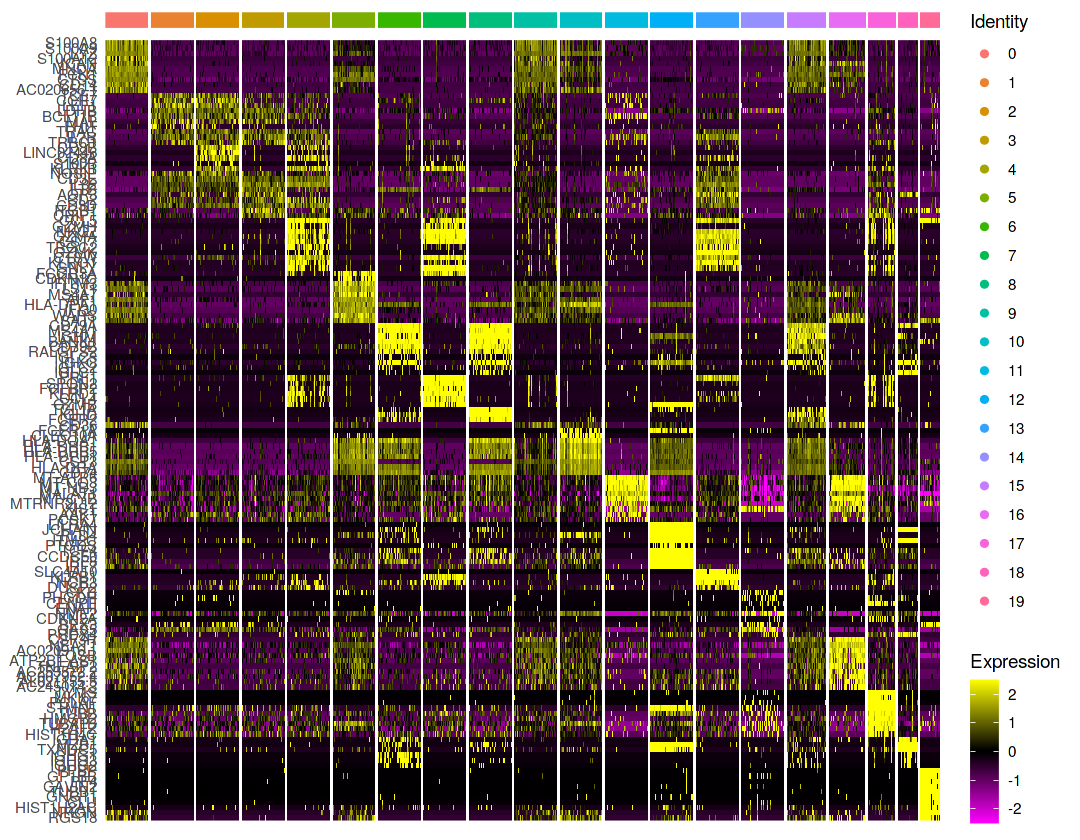

In [272]:
options(repr.plot.width=9, repr.plot.height=7)

#为了使少细胞cluster更明显
set.seed(20210215) #设置随机数，保证每次结果都一样。
DoHeatmap( subset(scRNA0, downsample=50 ), 
          features = genelist,
          label=F #防止报错，顶部不显示图例的文字
          # , group.by = "seurat_clusters" # 加不加一样
        )

## FeatureScatter散点图

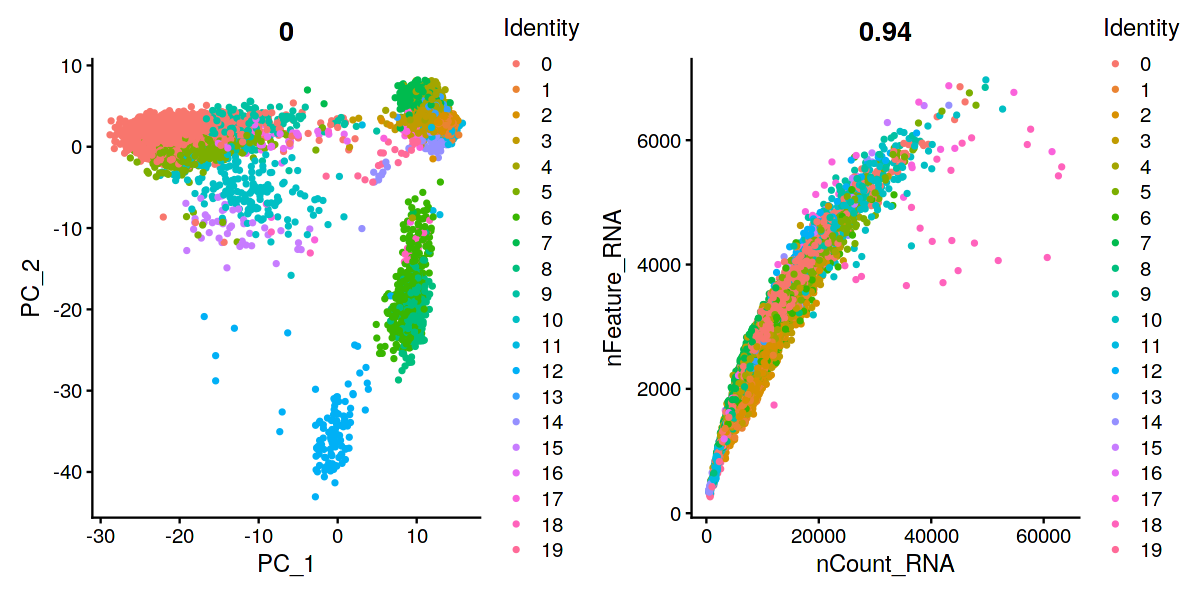

In [130]:
p1 <- FeatureScatter(scRNA0, feature1 = 'PC_1', feature2 = 'PC_2')
p2 <- FeatureScatter(scRNA0, feature1 = 'nCount_RNA', feature2 = 'nFeature_RNA')
plotc = p1|p2

options(repr.plot.width=10, repr.plot.height=5)
plotc

ggsave( paste0(outputRoot, '02_featurescatter_eg.pdf'), plotc, width = 10, height = 5)

### CD3+ 细胞按照CD4和CD8画图

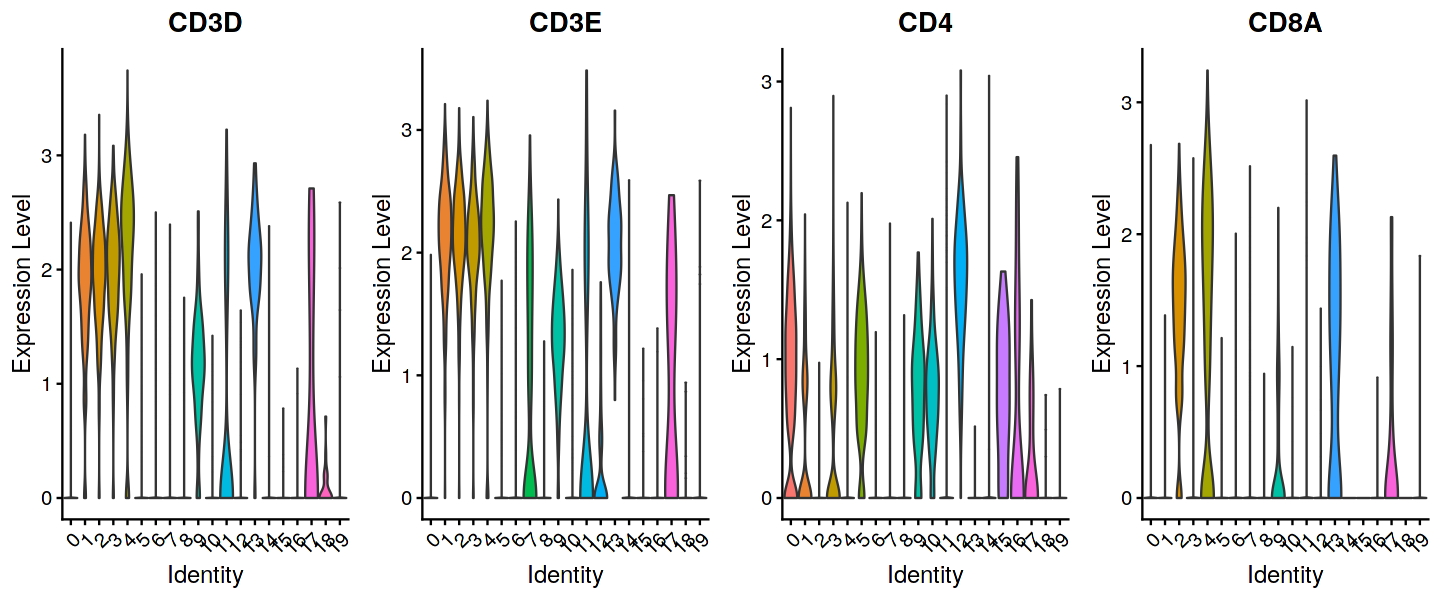

In [148]:
options(repr.plot.width=12, repr.plot.height=5)

VlnPlot(scRNA0, features =c("CD3D","CD3E", "CD4","CD8A"), ncol = 4, pt.size = 0 ) 

In [157]:
scSub=subset(scRNA0, subset = CD3D > 1)
scSub

table(scSub@meta.data$seurat_clusters)
# 取最多的几类

An object of class Seurat 
22860 features across 4799 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
  27 1212 1212 1195  688   17   65   35    7  153    7   49    8  106    1    0 
  16   17   18   19 
   1   12    0    4 

In [160]:
scSub=subset(scRNA0, idents = c(1,2,3,4, 9, 13))
scSub

table(scSub@meta.data$seurat_clusters)

An object of class Seurat 
22860 features across 4901 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
   0 1322 1252 1242  744    0    0    0    0  232    0    0    0  109    0    0 
  16   17   18   19 
   0    0    0    0 

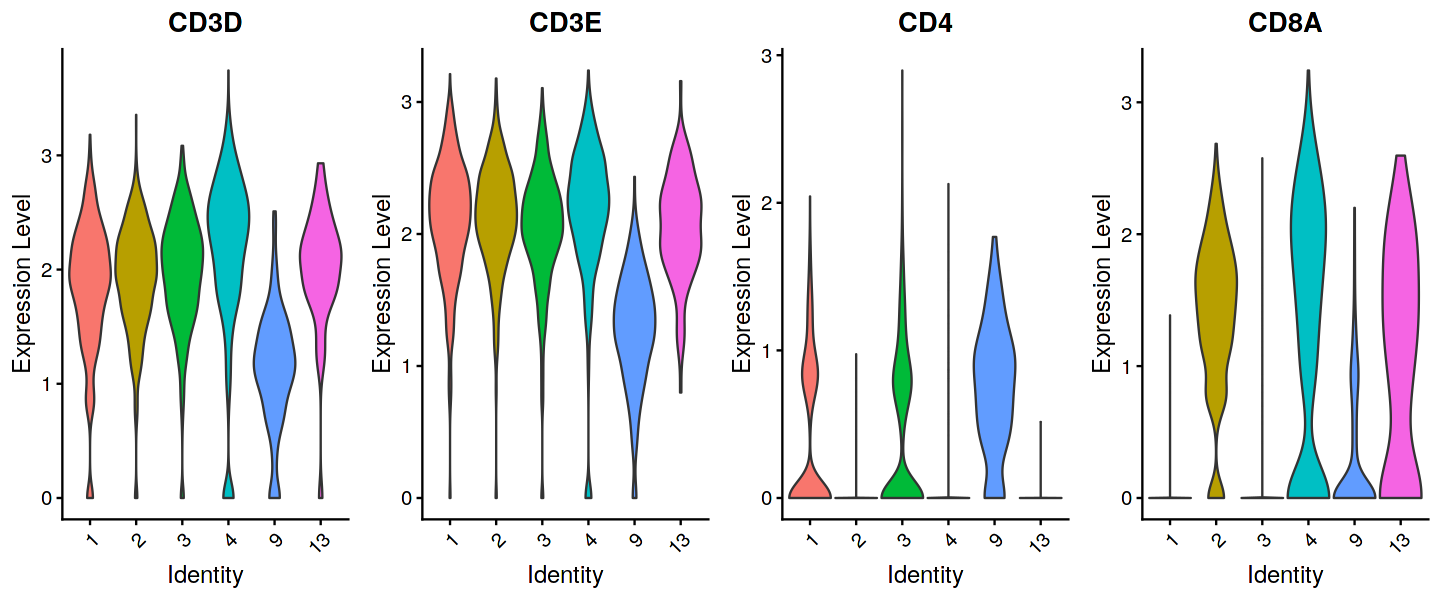

In [162]:
options(repr.plot.width=12, repr.plot.height=5)

VlnPlot(scSub, features =c("CD3D","CD3E", "CD4","CD8A"), ncol = 4, pt.size = 0 ) 

c9 都有一点点: CD4++ CD8+
- CD4: c1,3,9
- CD8: c2,4,13

### 可见：共表达效果很差。

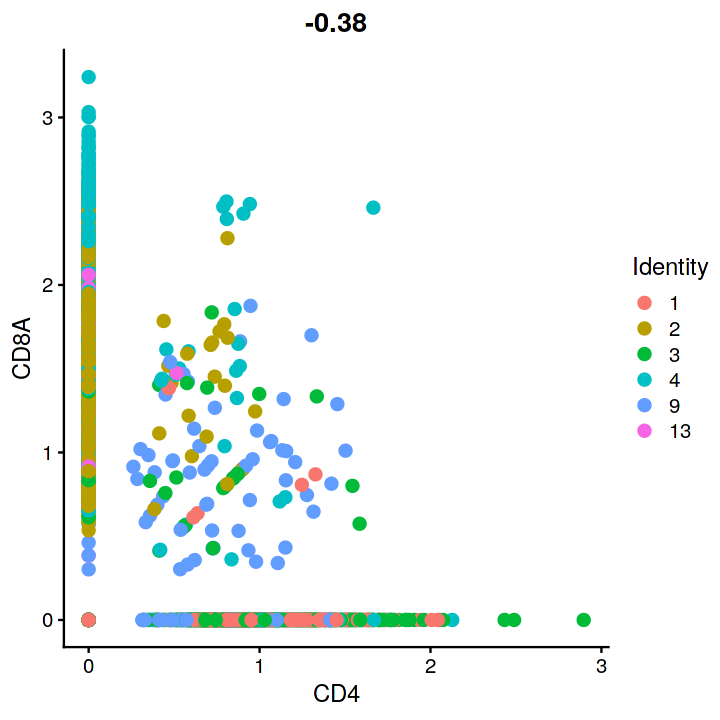

In [175]:
# 可见：共表达效果很差。

options(repr.plot.width=6, repr.plot.height=6)
FeatureScatter( scSub, #scale="log", 
               pt.size=3, #alpha=0.2,
               feature1 = 'CD4', feature2 = 'CD8A', 
               slot ="data")

## RidgePlot山脊图

Picking joint bandwidth of 0.0602

Picking joint bandwidth of 0.495

Picking joint bandwidth of 0.0602

Picking joint bandwidth of 0.495



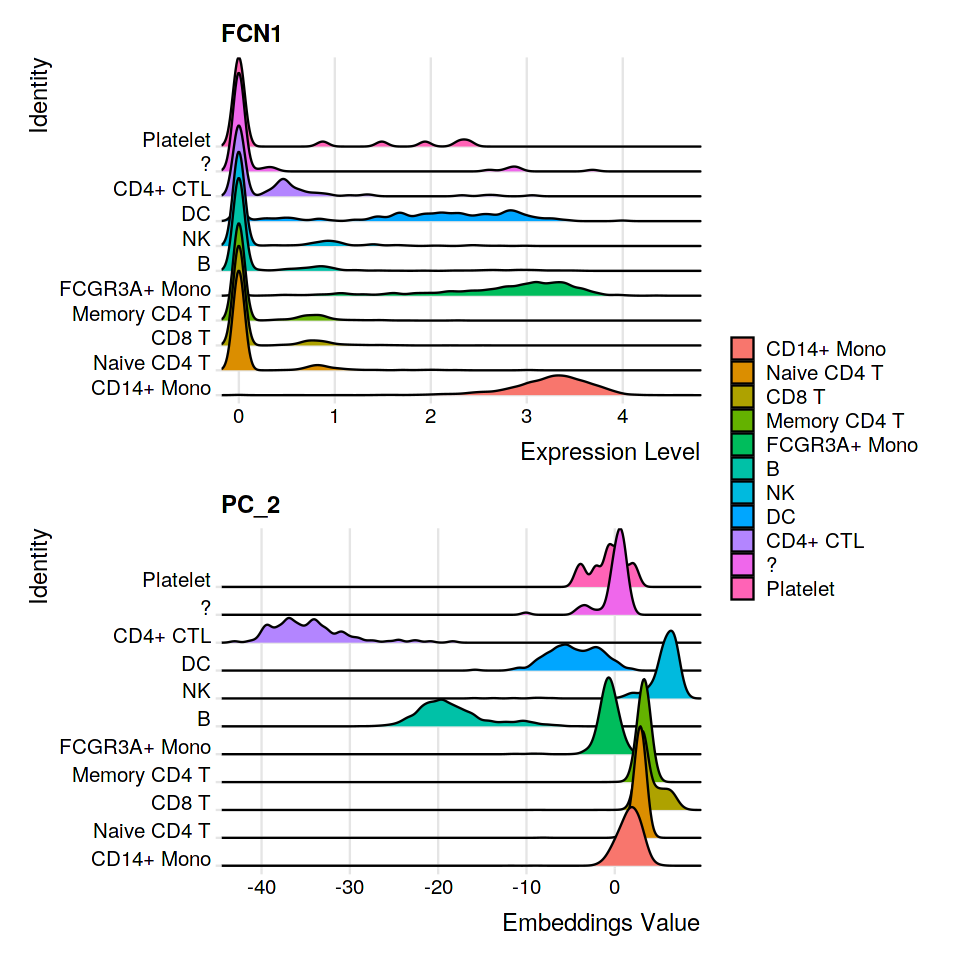

In [136]:
p1 = RidgePlot(scRNA, features = "FCN1")
p2 = RidgePlot(scRNA, features = "PC_2")
plotc = p1/p2 + plot_layout(guides = 'collect')

options(repr.plot.width=8, repr.plot.height=8)
plotc

ggsave( paste0(outputRoot,'02_ridgeplot_eg.pdf'), plotc, width = 8,height = 8)

Picking joint bandwidth of 0.0788



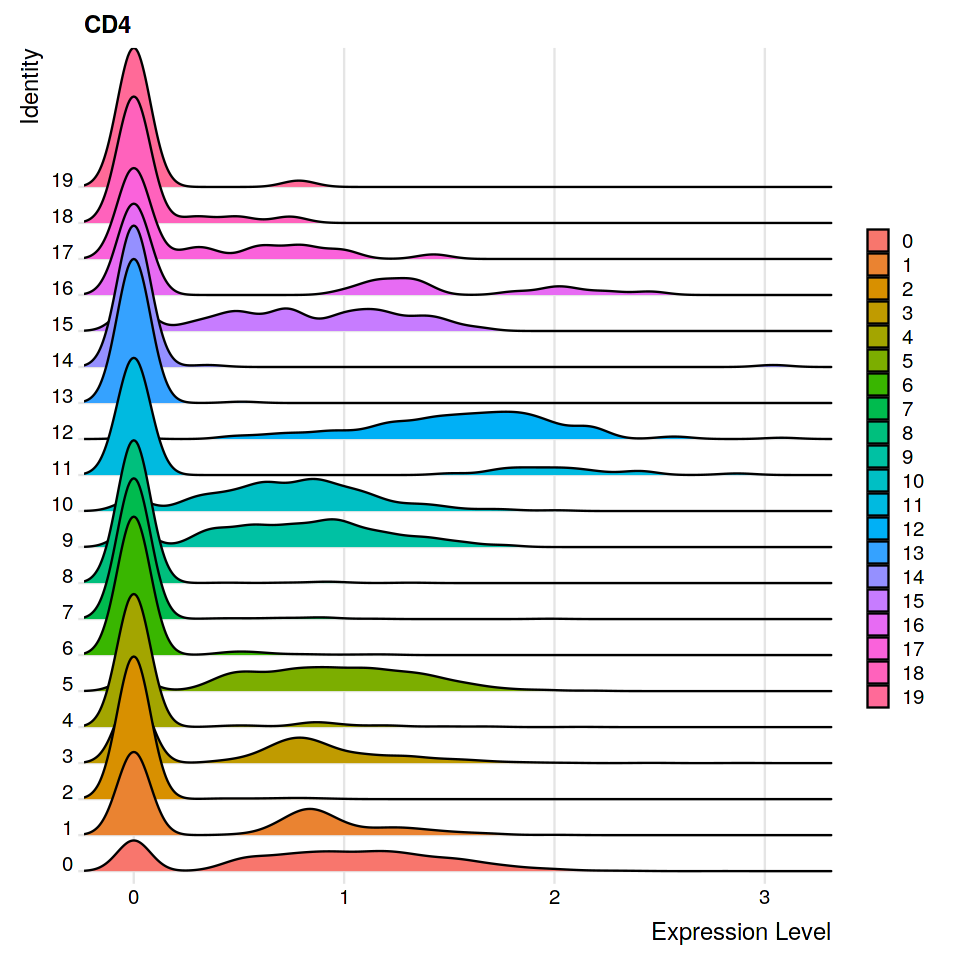

In [138]:
RidgePlot(scRNA0, features = "CD4")